In [ ]:
import pandas as pd

df2 = pd.read_csv('../Data/Data_2.csv')
print(df2.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [2]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
df2.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df2['gender'] = df2['gender'].astype('category')
df2['age'] = df2['age'].astype('int64')
df2['ever_married'] = df2['ever_married'].astype('category')
df2['Residence_type'] = df2['Residence_type'].astype('category')
print(df2.dtypes)

id                      int64
gender               category
age                     int64
hypertension            int64
heart_disease           int64
ever_married         category
work_type              object
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke                  int64
dtype: object


In [5]:
print(df2.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.215264      0.097456       0.054012   
std    21161.721625    22.633866      0.296607       0.226063   
min       67.000000     0.000000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

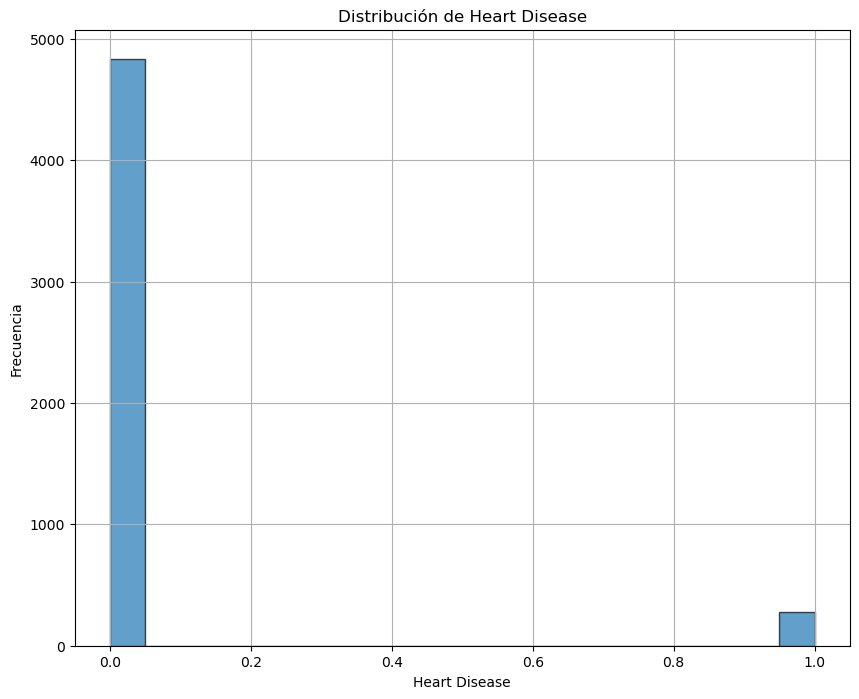

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.hist(df2['heart_disease'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribución de Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [7]:
import plotly.express as px

fig = px.box(df2, y = 'age', title='Distribución de age')
fig.show()

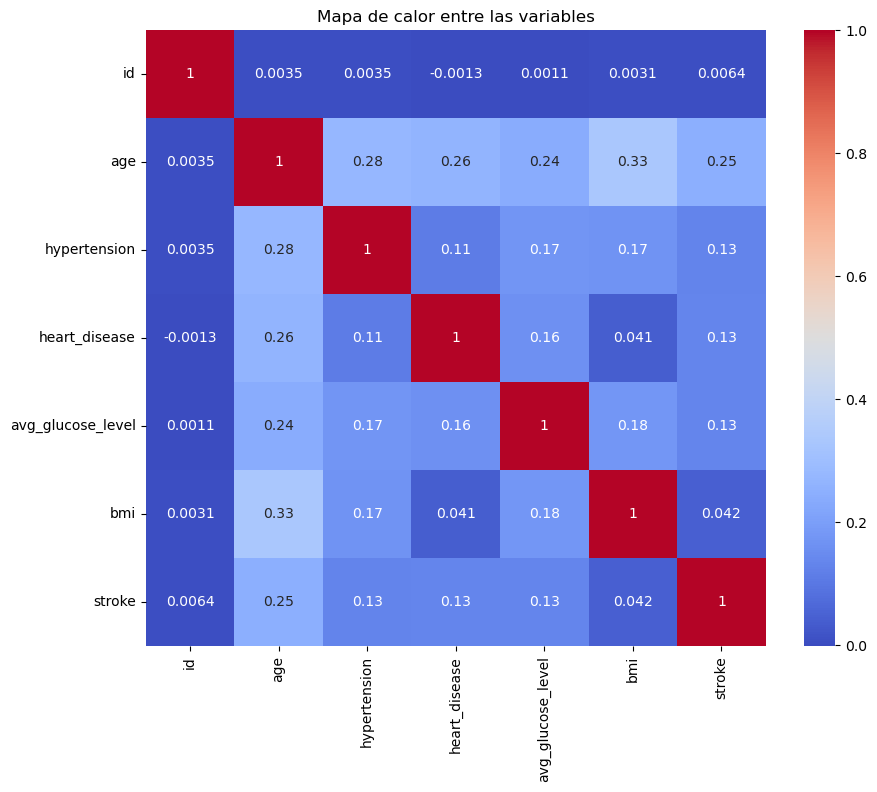

In [8]:
import seaborn as sns
df2_numeric = df2.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
correlation_matrix = df2_numeric.corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Mapa de calor entre las variables')
plt.show()

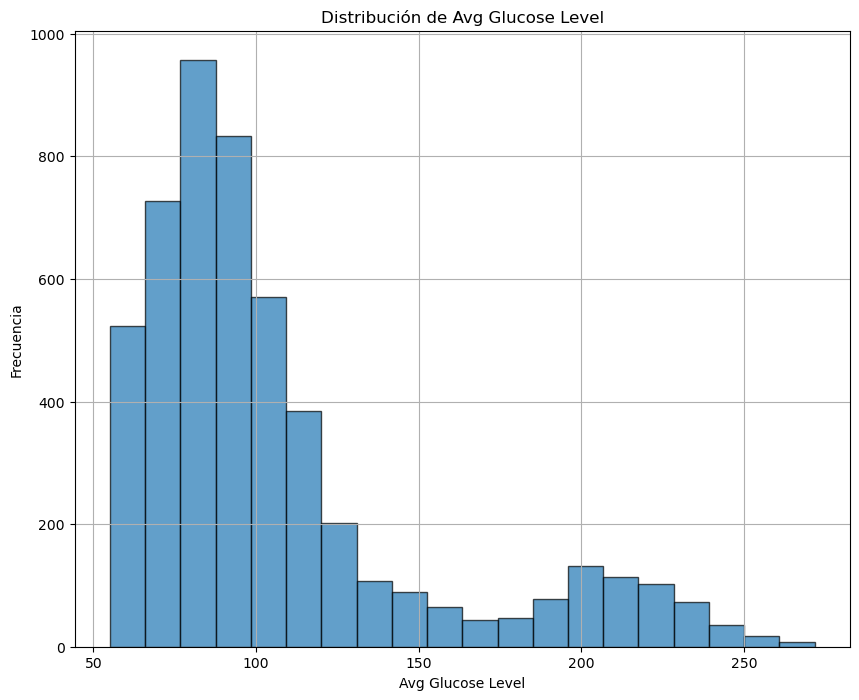

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.hist(df2['avg_glucose_level'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribución de Avg Glucose Level')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df2 = pd.read_csv('../Data/healthcare-dataset-stroke-data.csv')

#Selecciono la variable objetivo y la separo
X = df2.drop('stroke', axis = 1) 
y = df2['stroke'] 

#Ahora divido los conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Ahora hago el pipeline, utilizo pipeline porque lo utilicé en otros proyectos y la verdad que me gusta mucho su funcionamiento.

num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

#Creo los modelos
pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor), #Con esto llamo al preprocesamiento hecho más arriba
    ('classifier', LogisticRegression())
])

pipeline_KNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5)) 
])

pipeline_DT = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42))
])

pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42))
])

pipeline_XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

#Entreno los modelos 
pipeline_LR.fit(X_train, y_train)
pipeline_KNN.fit(X_train, y_train)
pipeline_DT.fit(X_train, y_train)
pipeline_RF.fit(X_train, y_train)
pipeline_XGB.fit(X_train, y_train)

#Hago las predicciones
y_pred_LR = pipeline_LR.predict(X_test)
y_pred_KNN = pipeline_KNN.predict(X_test)
y_pred_DT = pipeline_DT.predict(X_test)
y_pred_RF = pipeline_RF.predict(X_test)
y_pred_XGB = pipeline_XGB.predict(X_test)

#Una vez hecho todo esto, evalúo los modelos
print(f'Reporte del modelo Logistic Regression:')
print(classification_report(y_test, y_pred_LR))

print(f'Reporte del modelo K-Nearest Neighbors:')
print(classification_report(y_test, y_pred_KNN))

print(f'Reporte del modelo Decision Tree:')
print(classification_report(y_test, y_pred_DT))

print(f'Reporte del modelo Random Forest:')
print(classification_report(y_test, y_pred_RF))

print(f'Reporte del modelo XGBoost:')
print(classification_report(y_test, y_pred_XGB))

#También puedo comparar el accuracy de cada uno
accuracy_LR = accuracy_score(y_test, y_pred_LR)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)

#Puedo hacer un diccionario para que sea más facil mostrarlo
results = {
    'Model':["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [accuracy_LR, accuracy_KNN, accuracy_DT, accuracy_RF, accuracy_XGB]
}

results_df = pd.DataFrame(results)
print(results_df)

Reporte del modelo Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Reporte del modelo K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Reporte del modelo Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.15      0.11      0.13        62

    accuracy                           0.91      1022
   macro avg  

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users

In [12]:
from sklearn.model_selection import cross_val_score

# Validación cruzada 
scores_LR = cross_val_score(pipeline_LR, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression - Mean Accuracy:", scores_LR.mean())
print("Logistic Regression - Std Accuracy:", scores_LR.std())

scores_KNN = cross_val_score(pipeline_KNN, X_train, y_train, cv=5, scoring='accuracy')
print("K-Nearest Neighbors - Mean Accuracy:", scores_KNN.mean())
print("K-Nearest Neighbors - Std Accuracy:", scores_KNN.std())

scores_DT = cross_val_score(pipeline_DT, X_train, y_train, cv=5, scoring='accuracy')
print("Decision Tree - Mean Accuracy:", scores_DT.mean())
print("Decision Tree - Std Accuracy:", scores_DT.std())

scores_RF = cross_val_score(pipeline_RF, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest - Mean Accuracy:", scores_RF.mean())
print("Random Forest - Std Accuracy:", scores_RF.std())

scores_XGB = cross_val_score(pipeline_XGB, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost - Mean Accuracy:", scores_XGB.mean())
print("XGBoost - Std Accuracy:", scores_XGB.std())

Logistic Regression - Mean Accuracy: 0.9545013811038656
Logistic Regression - Std Accuracy: 0.0008947666578094714
K-Nearest Neighbors - Mean Accuracy: 0.9532779894240064
K-Nearest Neighbors - Std Accuracy: 0.0016204369779300363
Decision Tree - Mean Accuracy: 0.911451341152107
Decision Tree - Std Accuracy: 0.009337112856510309
Random Forest - Mean Accuracy: 0.9542568823263593
Random Forest - Std Accuracy: 0.0012277134929805098
XGBoost - Mean Accuracy: 0.9471628266093676
XGBoost - Std Accuracy: 0.003738385360286741
